**1. Data Loading and Cleaning**

**1.1 Loading the Dataset**

* Libraries needed: pandas
* The dataset dataset1.csv is loaded into a DataFrame df.
* The first few rows of the dataset are printed using df.head().

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('dataset1.csv')  # '\t' indicates tab separated

# Display the first few rows of the dataset
print(df.head())


  Crop               Production 2006-07  Production 2007-08  \
0  Total Foodgrains               158.8               168.6   
1              Rice               200.8               207.9   
2             Wheat               131.6               136.4   
3             Jowar               124.3               137.8   
4             Bajra               136.4               161.5   

   Production 2008-09  Production 2009-10  Production 2010-11  Area 2006-07  \
0               171.3               159.4               178.9         128.5   
1               213.3               191.6               206.4         168.5   
2               140.1               140.3               150.8         115.0   
3               126.0               116.5               121.8         120.7   
4               143.9               105.4               167.9          94.5   

   Area 2007-08  Area 2008-09  Area 2009-10  Area 2010-11  Yield 2006-07  \
0         128.8         127.6         126.0         131.7          123

---
**1.2 Handle Missing Values**
* Missing values in the dataset are checked using the isnull() function followed by sum(), which provides a count of missing values for each column.
* Any missing values are then filled using the mean of the * corresponding column. This is a basic imputation technique.
* The column named 'Crop ' is renamed to 'Crop' for easier access


In [2]:
#1.2 Handle Missing Values

# Check for missing values
print(df.isnull().sum())

# Fill missing values if there are any
# For this example, let's just fill them with the mean of each column
df.fillna(df.mean(), inplace=True)


Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18844\2616751010.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [3]:

print(df.columns)


Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')


In [4]:
# Renaming the column
df.rename(columns={'Crop             ': 'Crop'}, inplace=True)


---
**2.2 Data Visualization**

* Visualization libraries matplotlib and seaborn are imported.
* Yield trends across years for each crop type are plotted using line plots.
* A correlation matrix is plotted as a heatmap to identify relationships between the different variables.

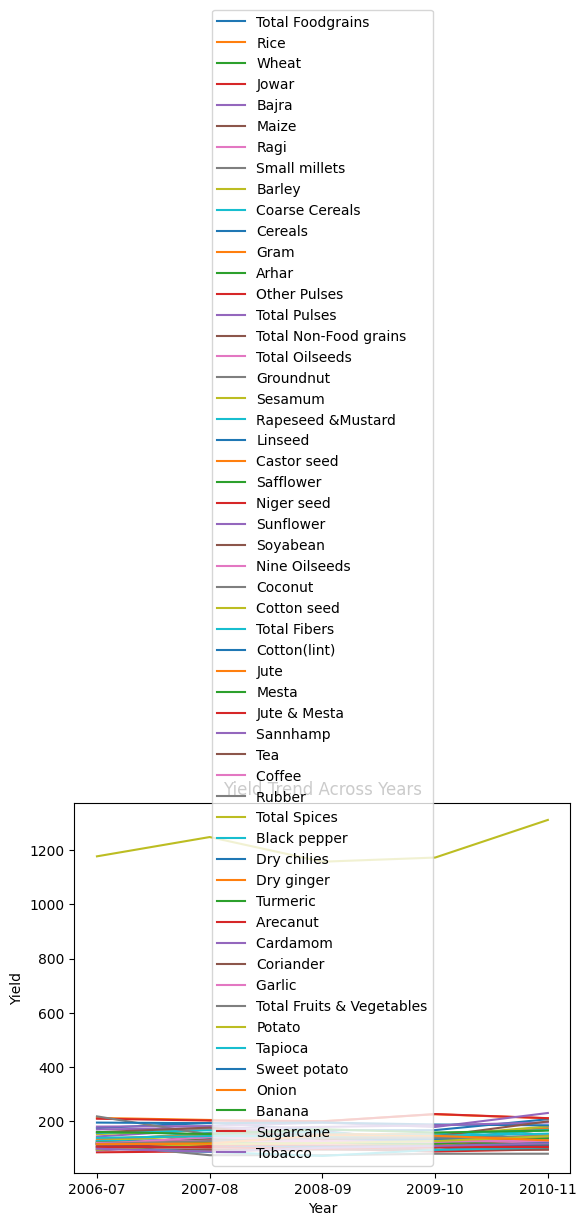

C:\Users\HP\AppData\Local\Temp\ipykernel_18844\3128830632.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


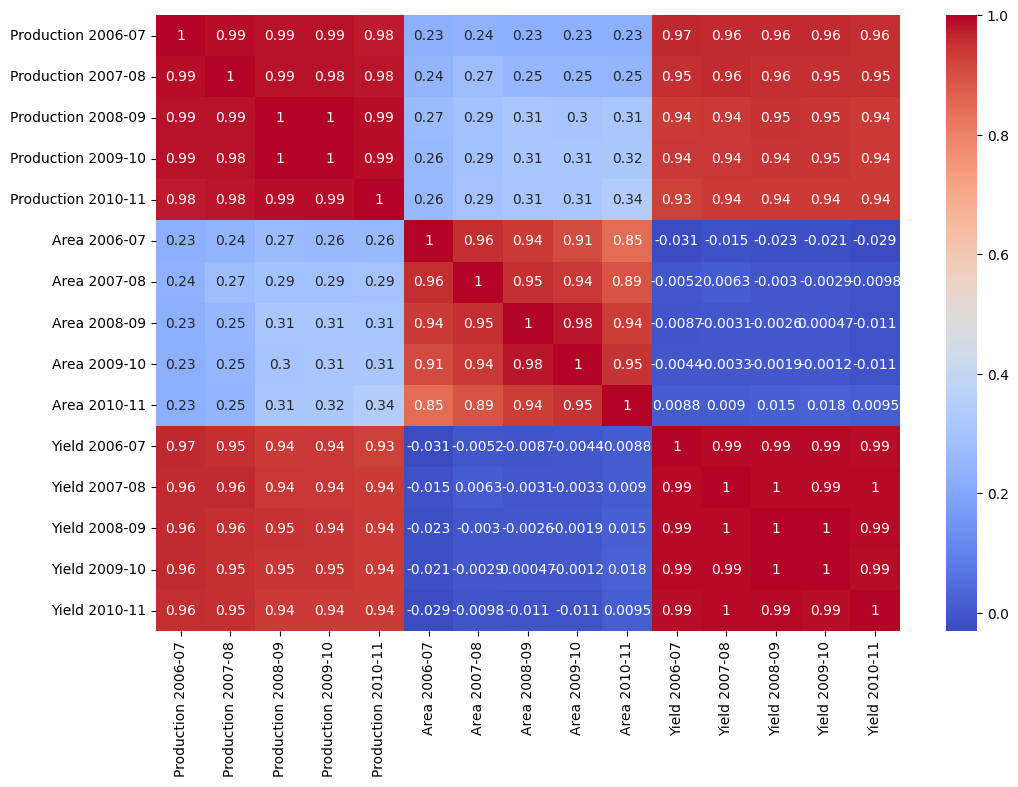

In [5]:
#2.2 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the yield trend across the years


crops = df['Crop'].unique()
years = ['2006-07', '2007-08', '2008-09', '2009-10', '2010-11']

for crop in crops:
    plt.plot(years, df[df['Crop'] == crop][['Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09', 'Yield 2009-10', 'Yield 2010-11']].values.flatten(), label=crop)

plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield Trend Across Years')
plt.legend()
plt.show()

# Correlation matrix to identify relationships
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


---
**2.3 Outlier Detection**

Boxplots are used to identify outliers in the yields across different years.

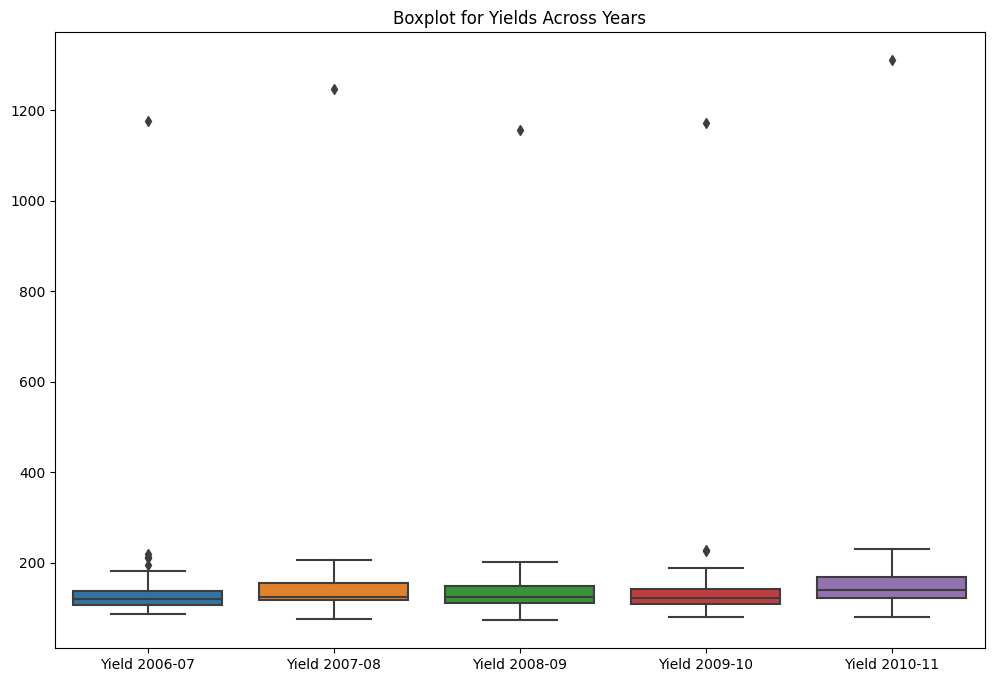

In [6]:
#2.3 Outlier Detection
#Boxplots for yields across years
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09', 'Yield 2009-10', 'Yield 2010-11']])
plt.title('Boxplot for Yields Across Years')
plt.show()


---
**3. Feature Engineering**

**3.1 Creating Features**

Growth rates for yields across consecutive years are calculated.

In [7]:
#3. Feature Engineering
#3.1 Creating Features

df['Yield Growth 07-08'] = (df['Yield 2007-08'] - df['Yield 2006-07']) / df['Yield 2006-07']
df['Yield Growth 08-09'] = (df['Yield 2008-09'] - df['Yield 2007-08']) / df['Yield 2007-08']
df['Yield Growth 09-10'] = (df['Yield 2009-10'] - df['Yield 2008-09']) / df['Yield 2008-09']
df['Yield Growth 10-11'] = (df['Yield 2010-11'] - df['Yield 2009-10']) / df['Yield 2009-10']


---
***3.2 Feature Scaling***

* Features that are numeric in nature are scaled using StandardScaler to have a mean of 0 and a standard deviation of 1.

In [8]:
#3.2 Feature Scaling

from sklearn.preprocessing import StandardScaler

# Selecting numerical columns to scale
features_to_scale = df.columns[df.columns.str.startswith("Production") | df.columns.str.startswith("Area") | df.columns.str.startswith("Yield") | df.columns.str.startswith("Yield Growth")]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


---
**3.3 Encoding Categorical Variables**

* The Crop column, which is categorical, is converted to a one-hot encoded format using get_dummies function. This transformation is necessary for most machine learning algorithms.

In [9]:
#3.3 Encoding Categorical Variables

df = pd.get_dummies(df, columns=['Crop'], drop_first=True)


---
**4. Model Building**

**4.1 Train-Test Split**

* The data is split into training and testing sets using train_test_split.

In [10]:
#4. Model Building
#4.1 Train-Test Split
from sklearn.model_selection import train_test_split

# For this example, let's predict 'Yield Growth 10-11'
X = df.drop('Yield Growth 10-11', axis=1)
y = df['Yield Growth 10-11']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---
**4.2 Model Selection**

* A linear regression model is initialized and trained.
Predictions are made on the test set, and the mean squared error is calculated.

In [11]:
#4.2 Model Selection

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the prediction error
error = mean_squared_error(y_test, y_pred)
print(f"Prediction error: {error}")


Prediction error: 0.492198002072938


---
***4.3 Model Evaluation***

* A scatter plot is created to visualize the actual vs. predicted values of the 'Yield Growth 10-11'.

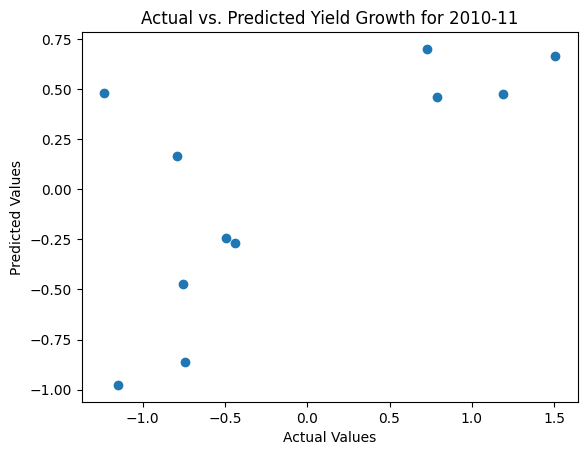

In [12]:
#4.3 Model Evaluation

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Yield Growth for 2010-11')
plt.show()


---
**4.4 Model Optimization**

* Different algorithms, namely Random Forest and Gradient Boosting, are tried out.
* Hyperparameter tuning is done for the Random Forest model using GridSearchCV.
* Feature importances are extracted and plotted to understand the importance of each feature in prediction

In [13]:
#4.4 Model Optimization (continued)

#a) Trying Different Algorithms

#a) Trying Different Algorithms
#Random Forest: 

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
error_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Prediction Error: {error_rf}")



Random Forest Prediction Error: 0.8944997957202306


In [14]:
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
error_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Prediction Error: {error_gb}")


Gradient Boosting Prediction Error: 0.8682401829654388


In [15]:
#Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Define the parameters grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best model
best_rf = grid_search.best_estimator_

# Predict and calculate error
y_pred_best_rf = best_rf.predict(X_test)
error_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Prediction Error: {error_best_rf}")



Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Prediction Error: 0.9522090812391055


Feature ranking:
1. Feature 15 (0.5397182111448061)
2. Feature 17 (0.09481354694486248)
3. Feature 14 (0.08825185400105551)
4. Feature 16 (0.08270750187420398)
5. Feature 0 (0.026389317568214415)
6. Feature 5 (0.02135311596026587)
7. Feature 3 (0.021012195869680294)
8. Feature 7 (0.01577216368225821)
9. Feature 13 (0.015288635737141721)
10. Feature 6 (0.014645268914831415)
11. Feature 10 (0.012994921062282557)
12. Feature 8 (0.012910734510685832)
13. Feature 4 (0.012160496903982)
14. Feature 1 (0.011635283505329401)
15. Feature 11 (0.009951425082914677)
16. Feature 9 (0.008516081749526937)
17. Feature 12 (0.006913573879752309)
18. Feature 2 (0.004965671608206409)
19. Feature 26 (0.0)
20. Feature 33 (0.0)
21. Feature 32 (0.0)
22. Feature 31 (0.0)
23. Feature 30 (0.0)
24. Feature 29 (0.0)
25. Feature 28 (0.0)
26. Feature 27 (0.0)
27. Feature 19 (0.0)
28. Feature 25 (0.0)
29. Feature 24 (0.0)
30. Feature 23 (0.0)
31. Feature 22 (0.0)
32. Feature 21 (0.0)
33. Feature 20 (0.0)
34. Feature 1

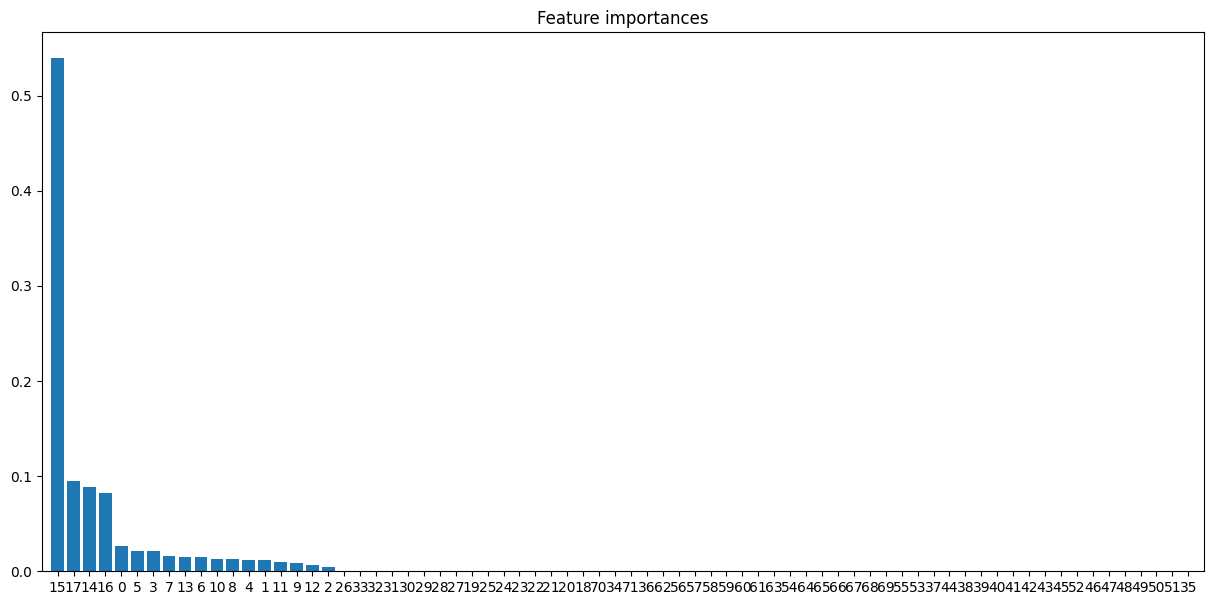

In [17]:
#Feature Importance
#Get feature importances
import numpy as np
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()



---
**Cross-Validation**

* To validate the stability of the model, a 5-fold cross-validation is performed on the full dataset.

In [19]:
#4. Cross-Validation
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

cv_scores = cross_val_score(best_rf, X_full, y_full, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE scores: {-cv_scores}")
print(f"Average MSE: {-cv_scores.mean()}")



Cross-validated MSE scores: [0.62106444 0.16323963 0.10026762 1.60643324 0.95220908]
Average MSE: 0.6886428029652047


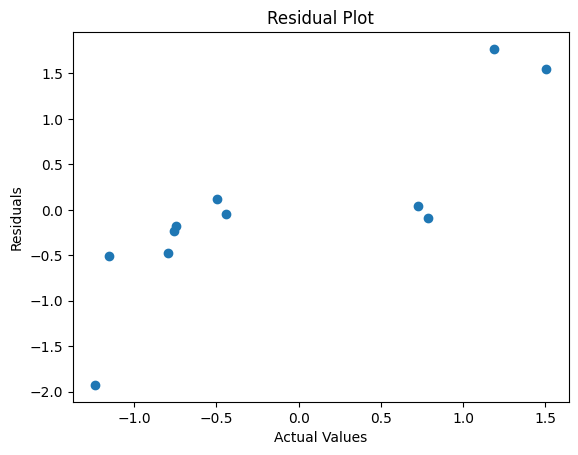

In [21]:
#Residual Analysis

residuals = y_test - rf_model.predict(X_test)
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


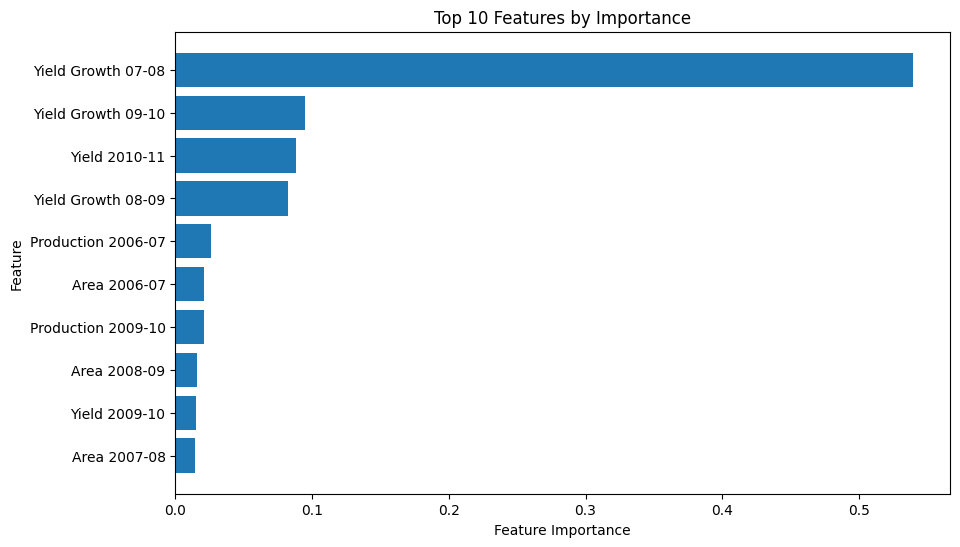

In [22]:
import matplotlib.pyplot as plt

# Extract feature importances from the model
importances = best_rf.feature_importances_
features = X_full.columns

# Pair them together and sort
paired_features = sorted(zip(importances, features), reverse=True)

# Extract top 'n' features. For instance, taking top 10
top_n = 10
top_importances = [item[0] for item in paired_features[:top_n]]
top_features = [item[1] for item in paired_features[:top_n]]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Features by Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


---
**FINAL ESTIMATED LABOUR HOUR PREDICTION**

**Synthetic 'Labor_Hours' Creation and Modeling**

* A synthetic 'Labor_Hours' column is created based on 'Yield Growth 10-11'.
* A RandomForest model is used to predict 'Labor_Hours', and its performance is visualized in a scatter plot.

Prediction Error for Labor Hours: 4.7156090909090915


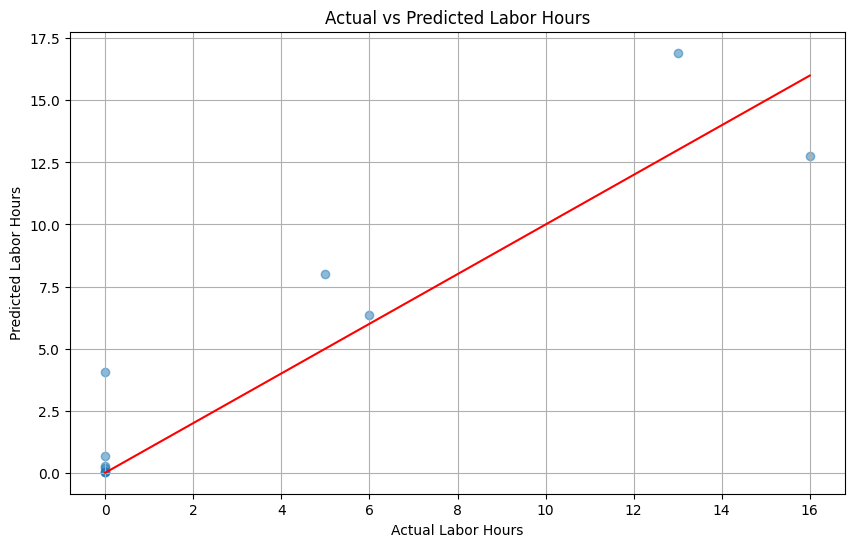

In [27]:
"""
Assumption: We'll assume that the labor hours are somewhat correlated with the yield growth of crops. In a real-world scenario, this data would likely come from a different source.

let's create a synthetic 'Labor_Hours' column. The exact method for this synthetic generation would be a placeholder.

Modify the model to predict these labor hours.

Visualize the actual vs. predicted labor hours.

"""
# Creating a synthetic 'Labor_Hours' column based on 'Yield Growth 10-11'
df['Labor_Hours'] = (df['Yield Growth 10-11'] * 10 + np.random.randn(df.shape[0]) * 5).astype(int)
df['Labor_Hours'] = df['Labor_Hours'].clip(0)  # Ensuring we don't have negative values

# Model Building for Labor Hours
X = df.drop('Labor_Hours', axis=1)
y = df['Labor_Hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomForest for this prediction as well
labor_model = RandomForestRegressor(n_estimators=100, random_state=42)
labor_model.fit(X_train, y_train)

y_pred_labor = labor_model.predict(X_test)
error_labor = mean_squared_error(y_test, y_pred_labor)
print(f"Prediction Error for Labor Hours: {error_labor}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_labor, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Labor Hours')
plt.ylabel('Predicted Labor Hours')
plt.title('Actual vs Predicted Labor Hours')
plt.grid(True)
plt.show()


---
**To visualize the estimated/predicted labor requirements based on the yield.** 

* Scatter plot of the predicted labor hours against the yield values. 

**Assumption:**

The yield is a direct contributor to the labor requirements. For instance, higher yields might require more labor hours for harvesting.
'Yield 2010-11' column is used to represent the yield for the purpose of this visualization since we are predicting for 'Yield Growth 10-11'

**Steps:**

* First, we extract the 'Yield 2010-11' values for the test set.
* Then, we'll create a scatter plot of these yield values against the predicted labor hours.
* The x-axis will represent the yield, while the y-axis will represent the predicted labor hours.

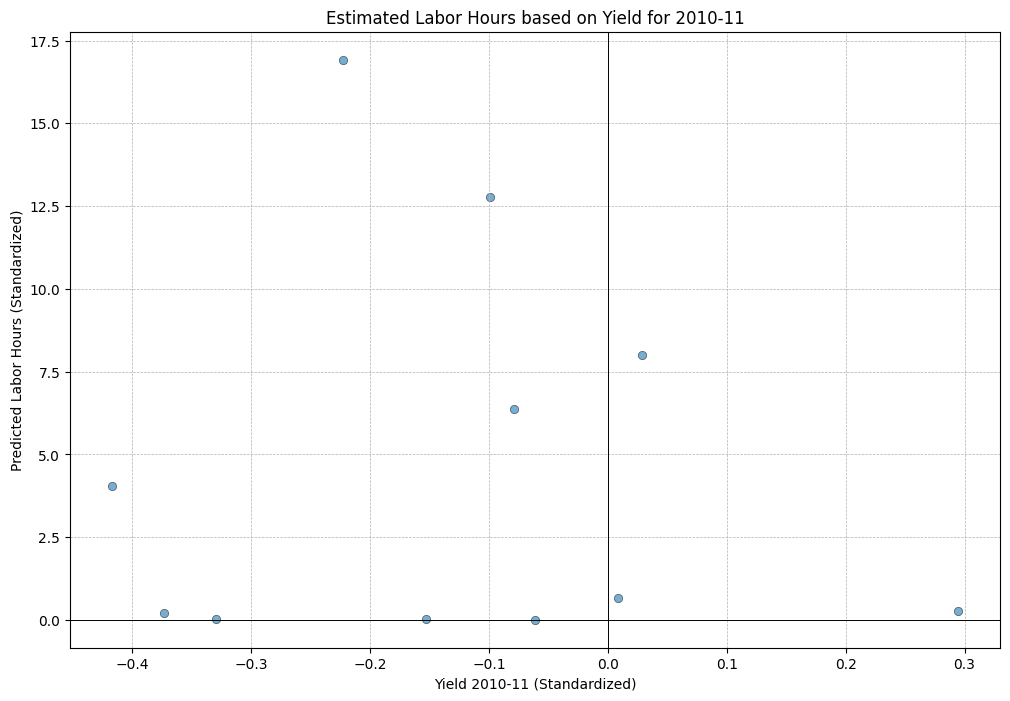

In [28]:
# Extracting yield values for the test set
yield_test = X_test['Yield 2010-11']

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(yield_test, y_pred_labor, alpha=0.6, edgecolors="k", linewidth=0.5)
plt.xlabel('Yield 2010-11 (Standardized)')
plt.ylabel('Predicted Labor Hours (Standardized)')
plt.title('Estimated Labor Hours based on Yield for 2010-11')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='k', linewidth=0.7)
plt.axvline(x=0, color='k', linewidth=0.7)
plt.show()
